## 1、仿真环境参数

In [1]:
# 仿真环境参数
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import collections
import os

from constants import DT, XML_DIR, START_ARM_POSE
from constants import PUPPET_GRIPPER_POSITION_CLOSE
from constants import PUPPET_GRIPPER_POSITION_UNNORMALIZE_FN
from constants import PUPPET_GRIPPER_POSITION_NORMALIZE_FN
from constants import PUPPET_GRIPPER_VELOCITY_NORMALIZE_FN

from utils import sample_box_pose, sample_insertion_pose
from dm_control import mujoco


xml_path = os.path.join(XML_DIR, f'bimanual_JAKA_pos_test.xml')
physics = mujoco.Physics.from_xml_path(xml_path)

# 关节转角
qpos = physics.data.qpos # 37 = 30+7(red_box_joint)
named_qpos = physics.named.data.qpos
named_xpos = physics.named.data.xpos
named_xquat = physics.named.data.xquat
# print(qpos)
# print(named_qpos)
print(named_xpos)
# print(named_xquat)

# 末端位置
mocap_xpos = physics.named.data.xpos['JAKA_arm_right/camera_focus']
mocap_xquat = physics.named.data.xquat['JAKA_arm_right/camera_focus']
print(mocap_xpos)
print(mocap_xquat)

# 显示仿真
viewer = physics.render()
plt.imshow(viewer)


ModuleNotFoundError: No module named 'constants'

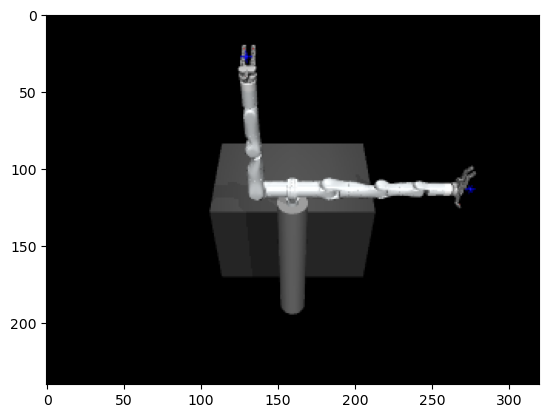

In [ ]:
# 正向运动学
init_qpos = np.array([pi/2, pi/2, 0., 0., 0., 0., 0.])

physics.data.qpos[:7] = init_qpos

physics.forward()


viewer = physics.render()
plt.imshow(viewer)

## 2、JAKA SDK 使用

In [ ]:
'''
Visualize the hdf5 data files
'''
from constants import DT
from visualize_episodes import *

## read hdf5 file
qpos, qvel, action, image_dict = load_hdf5('./data/sim_transfer_cube_scripted/', 'episode_1')

## visualize joints
# visualize_joints(qpos, action)

## save videos and plot
dataset_dir = './data/'
dataset_name = 'episode_0'
qpos, qvel, action, image_dict = load_hdf5(dataset_dir, dataset_name)
save_videos(image_dict, DT, video_path=os.path.join(dataset_dir, dataset_name + '_video.mp4'))
visualize_joints(qpos, action, plot_path=os.path.join(dataset_dir, dataset_name + '_qpos.png'))


Saved video to: ./data/episode_0_video.mp4
Saved qpos plot to: ./data/episode_0_qpos.png


In [ ]:
'''
Create Transfer Cube Simulation
'''
import time
import os
import numpy as np
import argparse
import matplotlib.pyplot as plt
import h5py

from constants import PUPPET_GRIPPER_POSITION_NORMALIZE_FN, SIM_TASK_CONFIGS
from ee_sim_env import make_ee_sim_env
from sim_env import make_sim_env, BOX_POSE
from scripted_policy import PickAndTransferPolicy, InsertionPolicy

task_name = 'sim_transfer_cube_scripted'
dataset_dir = SIM_TASK_CONFIGS[task_name]['dataset_dir']
num_episodes = SIM_TASK_CONFIGS[task_name]['num_episodes']
episode_len = SIM_TASK_CONFIGS[task_name]['episode_len']
camera_names = SIM_TASK_CONFIGS[task_name]['camera_names']
onscreen_render = True
inject_noise = False
render_cam_name = 'angle'

if not os.path.isdir(dataset_dir):
    os.makedirs(dataset_dir, exist_ok=True)

if task_name == 'sim_transfer_cube_scripted':
    policy_cls = PickAndTransferPolicy
elif task_name == 'sim_insertion_scripted':
    policy_cls = InsertionPolicy
else:
    raise NotImplementedError

success = []
for episode_idx in range(num_episodes):
    print(f'{episode_idx=}')
    print('Rollout out EE space scripted policy')
    # setup the environment
    env = make_ee_sim_env(task_name)
    ts = env.reset()
    episode = [ts]
    policy = policy_cls(inject_noise)
    # setup plotting
    if onscreen_render:
        ax = plt.subplot()
        plt_img = ax.imshow(ts.observation['images'][render_cam_name])
        plt.ion()
    for step in range(episode_len):
        action = policy(ts)
        ts = env.step(action)
        episode.append(ts)
        if onscreen_render:
            plt_img.set_data(ts.observation['images'][render_cam_name])
            plt.pause(0.002)
    plt.close()



episode_idx=0
Rollout out EE space scripted policy
episode_idx=1
Rollout out EE space scripted policy
episode_idx=2
Rollout out EE space scripted policy
episode_idx=3
Rollout out EE space scripted policy
episode_idx=4
Rollout out EE space scripted policy
episode_idx=5
Rollout out EE space scripted policy
episode_idx=6
Rollout out EE space scripted policy
episode_idx=7
Rollout out EE space scripted policy
episode_idx=8
Rollout out EE space scripted policy
episode_idx=9
Rollout out EE space scripted policy
episode_idx=10
Rollout out EE space scripted policy
episode_idx=11
Rollout out EE space scripted policy
episode_idx=12
Rollout out EE space scripted policy
episode_idx=13
Rollout out EE space scripted policy
episode_idx=14
Rollout out EE space scripted policy
episode_idx=15
Rollout out EE space scripted policy
episode_idx=16
Rollout out EE space scripted policy
episode_idx=17
Rollout out EE space scripted policy
episode_idx=18
Rollout out EE space scripted policy
episode_idx=19
Rollout

In [ ]:
'''
Create Transfer Cube Simulation
'''
import time
import os
import numpy as np
import argparse
import matplotlib.pyplot as plt
import h5py

from constants import PUPPET_GRIPPER_POSITION_NORMALIZE_FN, SIM_TASK_CONFIGS
from ee_sim_env import make_ee_sim_env
from sim_env import make_sim_env, BOX_POSE
from scripted_policy import PickAndTransferPolicy, InsertionPolicy

task_name = 'sim_transfer_cube_scripted'
dataset_dir = SIM_TASK_CONFIGS[task_name]['dataset_dir']
num_episodes = SIM_TASK_CONFIGS[task_name]['num_episodes']
episode_len = SIM_TASK_CONFIGS[task_name]['episode_len']
camera_names = SIM_TASK_CONFIGS[task_name]['camera_names']
onscreen_render = True
inject_noise = False
render_cam_name = 'angle'

if not os.path.isdir(dataset_dir):
    os.makedirs(dataset_dir, exist_ok=True)

policy_cls = PickAndTransferPolicy

env = make_ee_sim_env(task_name)
ts = env.reset()

FieldIndexer(qpos):
 0          l-j1 [ 0       ]
 1          l-j2 [ 0       ]
 2          l-j3 [ 0       ]
 3          l-j4 [ 0       ]
 4          l-j5 [ 0       ]
 5          l-j6 [ 0       ]
 6          l-j7 [ 0       ]
 7      l-bh-j32 [ 0       ]
 8      l-bh-j33 [ 0       ]
 9      l-bh-j11 [ 0       ]
10      l-bh-j12 [ 0       ]
11      l-bh-j13 [ 0       ]
12      l-bh-j21 [ 0       ]
13      l-bh-j22 [ 0       ]
14      l-bh-j23 [ 0       ]
15          r-j1 [ 0       ]
16          r-j2 [ 0       ]
17          r-j3 [ 0       ]
18          r-j4 [ 0       ]
19          r-j5 [ 0       ]
20          r-j6 [ 0       ]
21          r-j7 [ 0       ]
22      r-bh-j32 [ 0       ]
23      r-bh-j33 [ 0       ]
24      r-bh-j11 [ 0       ]
25      r-bh-j12 [ 0       ]
26      r-bh-j13 [ 0       ]
27      r-bh-j21 [ 0       ]
28      r-bh-j22 [ 0       ]
29      r-bh-j23 [ 0       ]
30 red_box_joint [ 0.2     ]
31 red_box_joint [ 0.5     ]
32 red_box_joint [ 0.05    ]
33 red_box_joint [ 1   

ValueError: could not broadcast input array from shape (4,) into shape (0,)

In [ ]:
# from JAKASDK import libjakaAPI 
from JAKASDK import jkrc
robot = jkrc.RC("192.168.2.64")#返回一个机器人对象
robot.login() #登录
robot.enable_robot()#
robot.logout() #登出


ImportError: libjakaAPI.so: cannot open shared object file: No such file or directory